<a href="https://colab.research.google.com/github/syedabusafwan/syedabusafwan/blob/practice/Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                           title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset           Customer Shopping (Latest Trends) Dataset      76KB  2024-11-23 15:26:12           4912         96  1.0              
heidarmirhajisadati/regional-cost-of-living-analysis          Regional Cost of Living Analysis               13KB  2024-11-30 22:38:52            695         38  1.0              
hopesb/student-depression-dataset                             Student Depression Dataset.                   454KB  2024-11-22 17:56:03           2422         40  0.9411765        
steve1215rogg/student-lifestyle-dataset                       student lifestyle dataset             

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 11.3 MB/s eta 0:00:00


In [ ]:
# getting started with the model
# importing required libraries/packages

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import visualkeras
from PIL import ImageFont
#font = ImageFont.truetype("arial.ttf", 12)

import warnings
warnings.filterwarnings('ignore')

print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)

Tensorflow version: 2.17.1
Keras version: 3.5.0


In [ ]:
print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('Y_train Shape: {}'.format(Y_train.shape))
print('Y_test Shape: {}'.format(Y_test.shape))

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


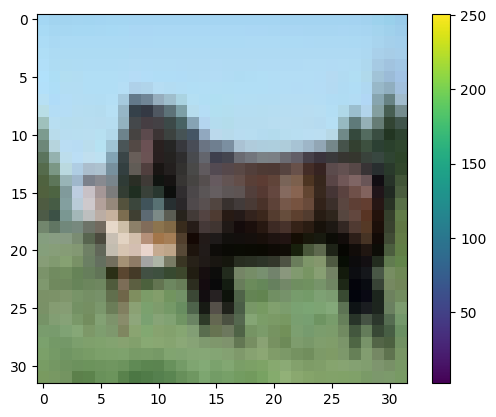

In [ ]:
plt.figure()
plt.imshow(X_train[12])
plt.colorbar()

In [ ]:
# Normalizing
X_train = X_train/255
X_test = X_test/255

# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

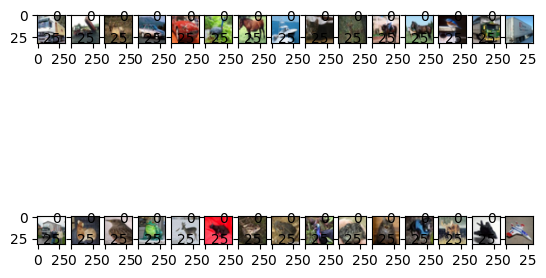

In [ ]:
# Visualizing the data
for i in range(1,31):
  plt.subplot(2, 15, i)
  plt.imshow(X_train[i])

In [ ]:
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

ValueError: Please provide a TPU Name to connect to.

In [ ]:
# detect and init the TPU
# If running on Google Colab, set the TPU name automatically
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.master())
except ValueError:
  tpu = None

if tpu:
  tf.config.experimental_connect_to_cluster(tpu)
  tf.tpu.experimental.initialize_tpu_system(tpu)
  tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
  # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
  tpu_strategy = tf.distribute.get_strategy()

In [ ]:
with tpu_strategy.scope():
    # Base Model
    model = Sequential()
    model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation ='relu'))
    model.add(Dense(10, activation ='softmax'))
    model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [ ]:
model.summary()
history = model.fit(X_train, Y_train_en, epochs = 30, verbose=1,validation_data=(X_test,Y_test_en))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,802 (475.79 KB)

 Trainable params: 121,802 (475.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 41ms/step - accuracy: 0.3499 - loss: 1.7636 - val_accuracy: 0.5291 - val_loss: 1.3065
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.5504 - loss: 1.2529 - val_accuracy: 0.5746 - val_loss: 1.1815
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.6135 - loss: 1.1059 - val_accuracy: 0.6194 - val_loss: 1.0831
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.6486 - loss: 1.0076 - val_accuracy: 0.6294 - val_loss: 1.0593
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.6757 - loss: 0.9319 - val_accuracy: 0.6341 - val_loss: 1.0579
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.6985 - loss: 0.8697 - val_accuracy: 0.6529 - val_loss: 1.0007
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7238 - loss: 0.7984 - val_accuracy: 0.6536 - val_loss: 1.0147
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 40ms/step - accuracy: 0.7352 -

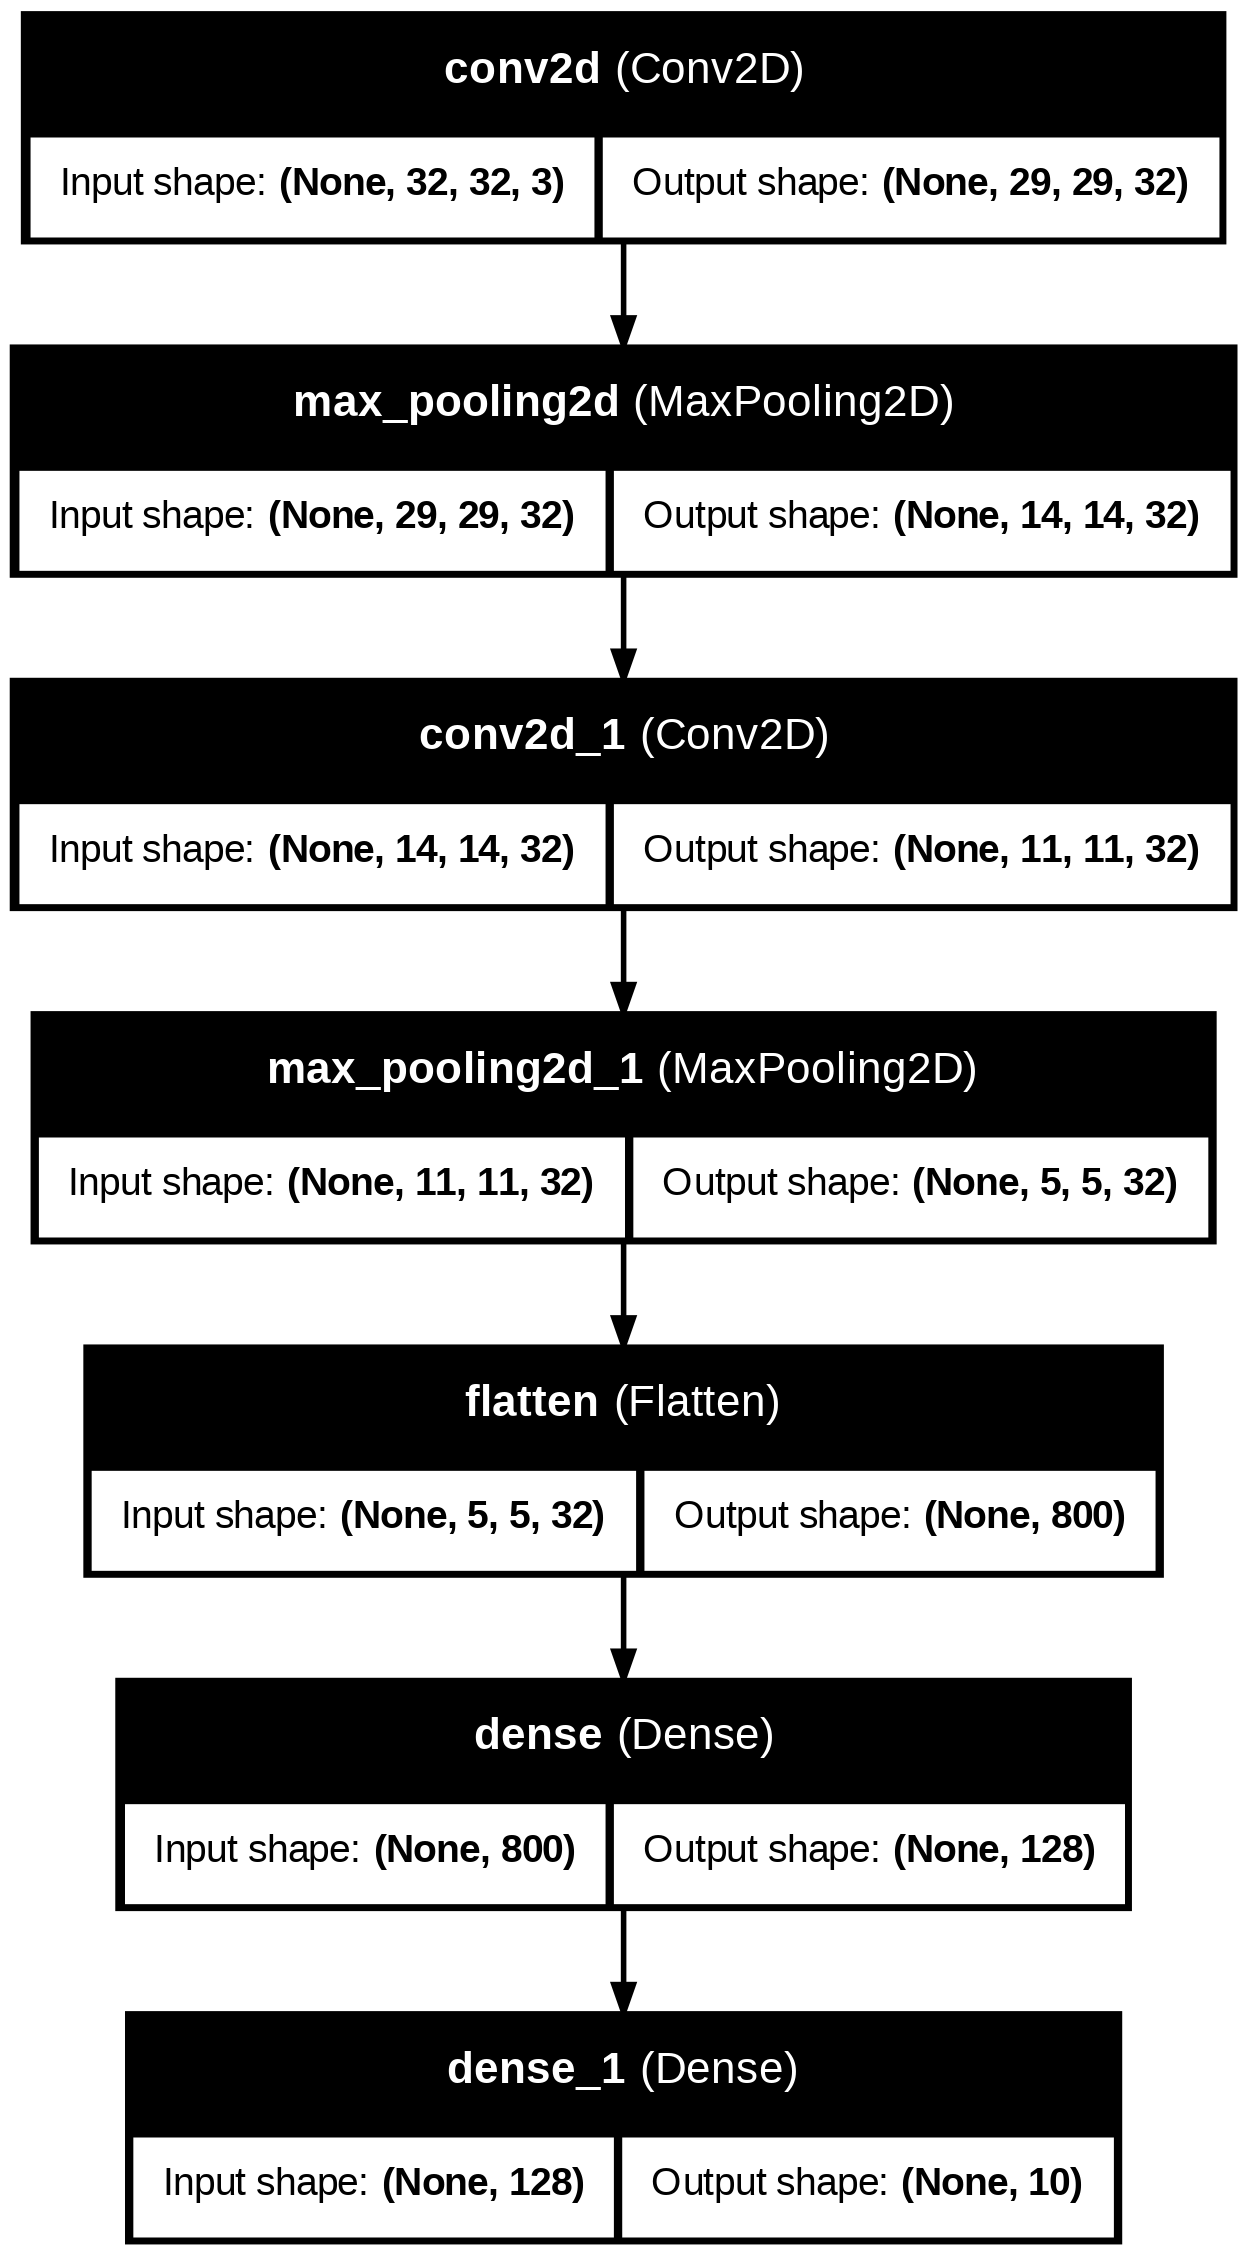

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

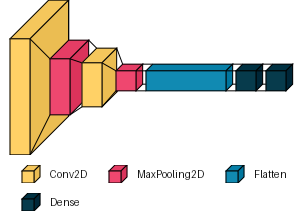

In [ ]:
visualkeras.layered_view(model, legend=True)

In [ ]:
evaluation = model.evaluate(X_test, Y_test_en)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.6405 - loss: 2.1034
Test Accuracy of Base Model: 0.6399999856948853


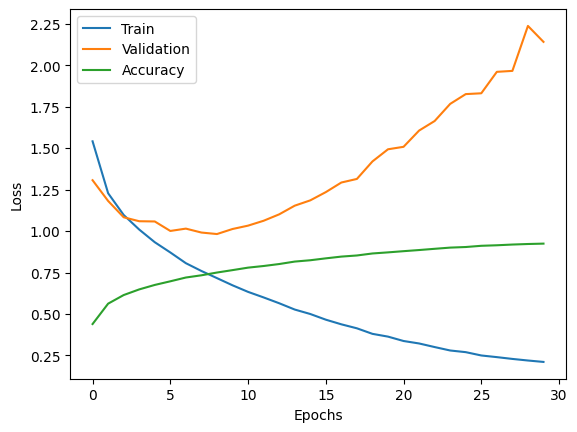

In [ ]:
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history)

In [ ]:
# Model_1 with Dropouts
model_1 = Sequential()
model_1.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.5))
model_1.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))
model_1.add(Flatten())
model_1.add(Dense(256,activation='relu'))
model_1.add(Dense(10,activation='softmax'))
model_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_1.summary()
history_1 = model_1.fit(X_train, Y_train_en, epochs = 50, verbose=1, validation_data=(X_test,Y_test_en))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         409,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481,162 (1.84 MB)

 Trainable params: 481,162 (1.84 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 99ms/step - accuracy: 0.3404 - loss: 1.7860 - val_accuracy: 0.5372 - val_loss: 1.2958
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 95ms/step - accuracy: 0.5409 - loss: 1.2874 - val_accuracy: 0.5800 - val_loss: 1.1854
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 96ms/step - accuracy: 0.5963 - loss: 1.1456 - val_accuracy: 0.5946 - val_loss: 1.1530
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 97ms/step - accuracy: 0.6267 - loss: 1.0569 - val_accuracy: 0.6562 - val_loss: 0.9921
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 100ms/step - accuracy: 0.6542 - loss: 0.9783 - val_accuracy: 0.6687 - val_loss: 0.9552
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 99ms/step - accuracy: 0.6792 - loss: 0.9138 - val_accuracy: 0.6778 - val_loss: 0.9298
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 97ms/step - accuracy: 0.6951 - loss: 0.8664 - val_accuracy: 0.6571 - val_loss: 1.0032
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 98ms/step - accuracy:

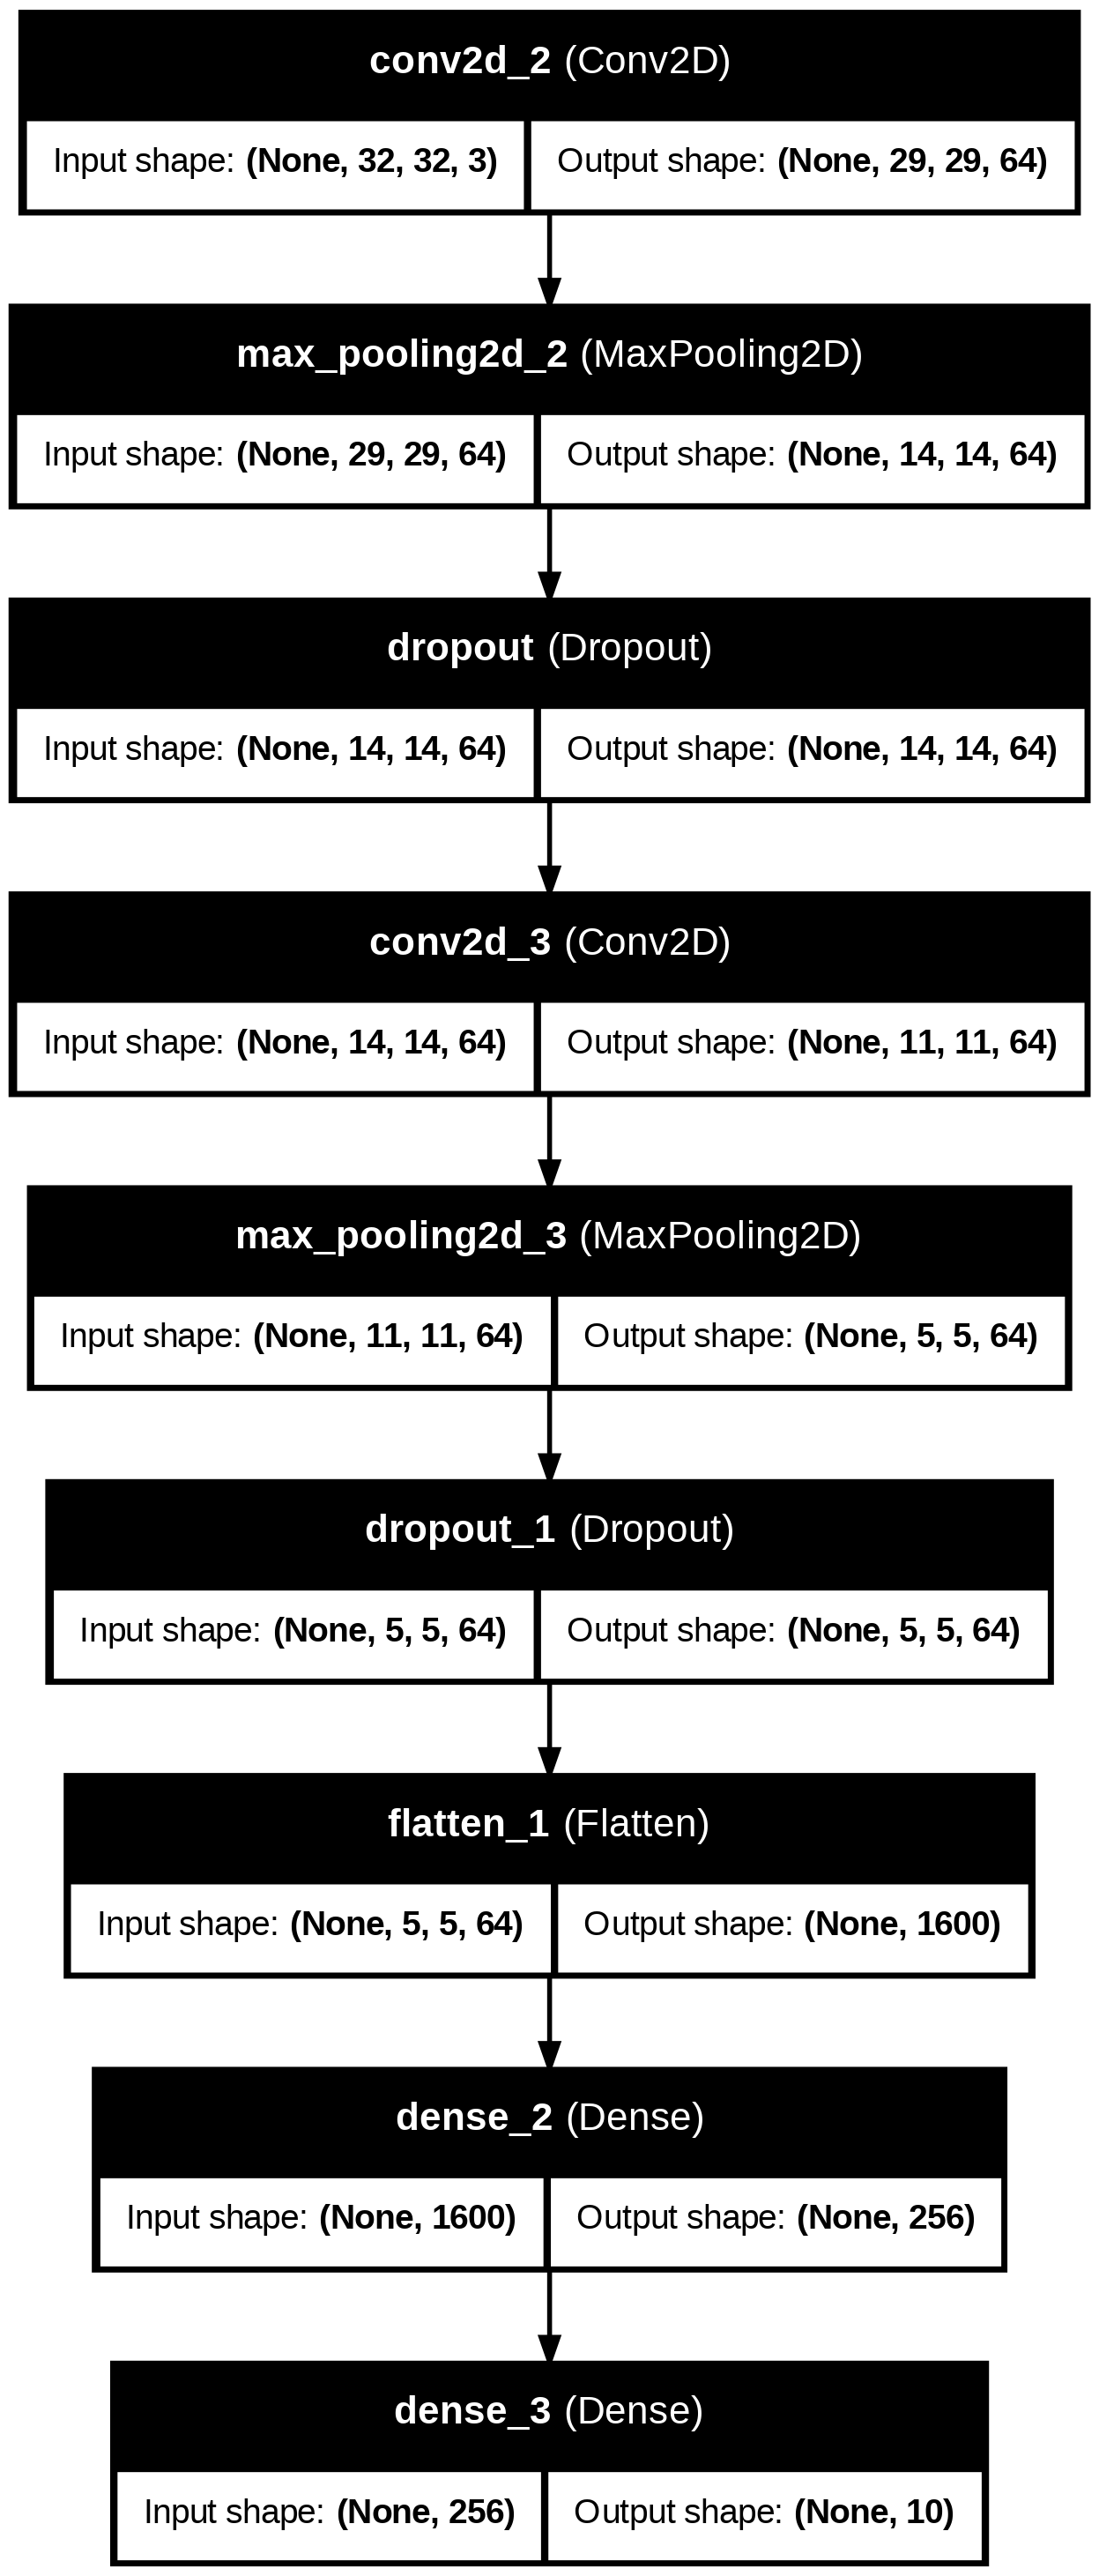

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

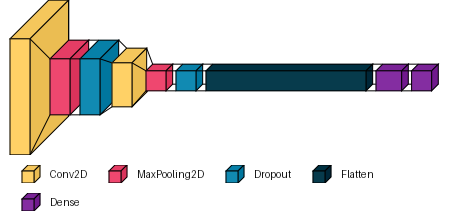

In [ ]:
visualkeras.layered_view(model_1, legend=True)

In [ ]:
evaluation = model_1.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_1(with Dropouts): {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7133 - loss: 1.1400
Test Accuracy of Model_1(with Dropouts): 0.7156999707221985


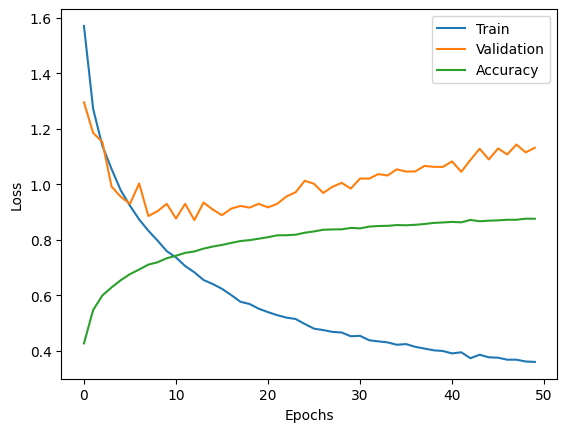

In [ ]:
def plotloss(history_1):
    plt.plot(history_1.history['loss'])
    plt.plot(history_1.history['val_loss'])
    plt.plot(history_1.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history_1)

In [ ]:
# Model_2 with more filters
model_2 = Sequential()
model_2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4))
model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.4))
model_2.add(Flatten())
model_2.add(Dense(1024,activation='relu'))
model_2.add(Dense(1024,activation='relu'))
model_2.add(Dense(units =10  , activation = 'softmax'))
model_2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model_2.summary()
history_2 = model_2.fit(X_train, Y_train_en, epochs = 100, verbose=1, validation_data=(X_test,Y_test_en))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       1,180,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,108,192 (30.93 MB)

 Trainable params: 2,702,730 (10.31 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,405,462 (20.62 MB)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 739s 473ms/step - accuracy: 0.5547 - loss: 1.2517 - val_accuracy: 0.5822 - val_loss: 1.1748
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 760s 485ms/step - accuracy: 0.5838 - loss: 1.1775 - val_accuracy: 0.6105 - val_loss: 1.0967
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 796s 481ms/step - accuracy: 0.6077 - loss: 1.1023 - val_accuracy: 0.6433 - val_loss: 1.0278
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 797s 478ms/step - accuracy: 0.6339 - loss: 1.0440 - val_accuracy: 0.6411 - val_loss: 1.0243
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 751s 481ms/step - accuracy: 0.6445 - loss: 1.0128 - val_accuracy: 0.6549 - val_loss: 0.9994
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 793s 475ms/step - accuracy: 0.6587 - loss: 0.9720 - val_accuracy: 0.6736 - val_loss: 0.9397
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 749s 479ms/step - accuracy: 0.6720 - loss: 0.9316 - val_accuracy: 0.6792 - val_loss: 0.9231
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 795s 475ms/s